In [6]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [7]:
data = pd.read_csv('C:\\Users\\icosane\\Documents\\univ\\archive (2)\\apple_quality.csv')

#https://www.kaggle.com/datasets/zeesolver/apple-quality

In [8]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


выделим Quality в target

In [9]:
target = []
for i in data['Quality']:
  if i == 'good':
    target.append(0)
  if i == 'bad':
    target.append(1)
data['Target'] = target

In [10]:
#разделим на набор признаков и данных

In [11]:
X = data.drop(columns=['A_id','Quality','Target'])
X.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [12]:
y = data['Target'].values
y[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [13]:
# 1.Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [61]:
X_train

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
914,-3.699119,-1.922430,-1.971064,2.204418,0.115186,1.769828,-3.135861
186,-1.623600,1.667151,-1.004612,-0.173799,-2.276912,0.914227,2.056640
1956,-3.288756,0.065990,1.196369,2.313422,-1.005348,0.227669,2.503739
957,1.695873,-2.170523,-2.490740,1.009216,-1.022447,0.929089,-1.072149
386,-1.577720,-0.951959,-0.268934,-0.226795,2.031647,-0.612471,2.148967
...,...,...,...,...,...,...,...
3535,-0.604538,-0.646111,1.381263,1.281144,-2.171926,-1.473862,0.061930
3939,1.306863,-1.877131,2.142988,0.454001,0.946520,-2.379992,2.367434
3280,0.417919,-0.542236,-2.401747,5.909078,-2.659454,-1.804979,-0.811324
1074,-3.646452,-0.239611,-0.306738,-0.662168,-1.193714,2.504408,-0.625380


In [14]:
# 2.Первичное обучение модели и оценка качества
cl1_1 = KNeighborsClassifier(n_neighbors=5)
cl1_1.fit(X_train, y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.9309375, 0.90125)

In [15]:
#Оцените качество модели с помощью подходящих для задачи метрик.

def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [16]:
print_accuracy_score_for_classes(y_train, target1_0)

Метка 	 Accuracy
0 	 0.940736119775421
1 	 0.9211020663744521


In [17]:
print_accuracy_score_for_classes(y_test, target1_1)

Метка 	 Accuracy
0 	 0.8977556109725686
1 	 0.9047619047619048


In [18]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

# Если целевой признак ==2, 
# то будем считать этот случай 1 в бинарном признаке
bin_y_train = convert_target_to_binary(y_train, 2)
list(zip(y_train, bin_y_train))[:10]

bin_y_test = convert_target_to_binary(y_test, 2)
list(zip(y_test, bin_y_test))[:10]

[(0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0)]

In [19]:
# Конвертация предсказанных признаков
bin_target1_1 = convert_target_to_binary(target1_0, 2)
bin_target1_2 = convert_target_to_binary(target1_1, 2)

In [20]:
balanced_accuracy_score(bin_y_train, bin_target1_1)

1.0

In [21]:

balanced_accuracy_score(bin_y_test, bin_target1_2)

1.0

In [22]:
confusion_matrix(bin_y_train, bin_target1_1, labels=[0, 1])

array([[3200,    0],
       [   0,    0]], dtype=int64)

In [23]:
cm = confusion_matrix(y_test, target1_1, labels=[0, 1])

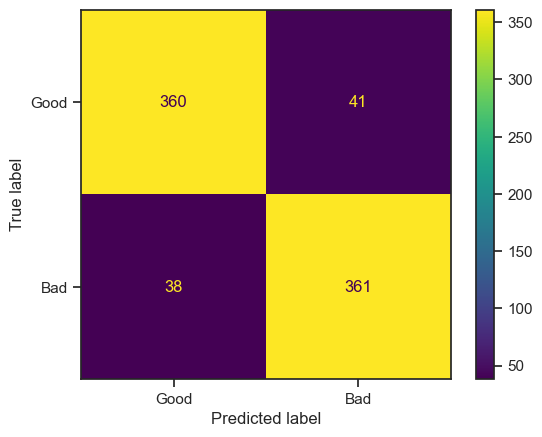

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                      display_labels=['Good','Bad'])
disp.plot()

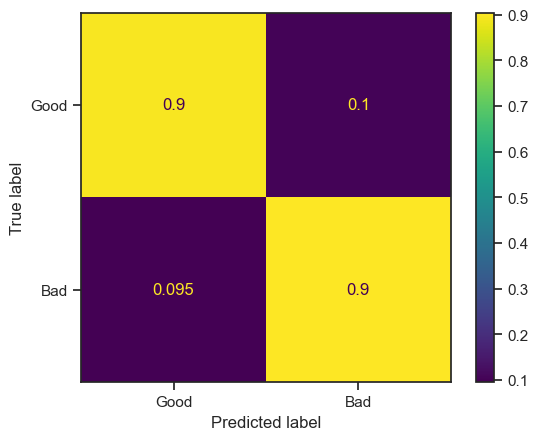

In [25]:
disp = ConfusionMatrixDisplay.from_estimator(cl1_1, X_test, y_test, 
                      display_labels=['Good','Bad'],normalize='true')

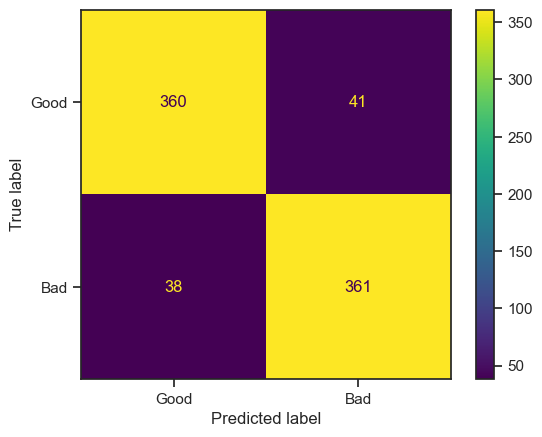

In [26]:
cm2 = confusion_matrix(y_test, target1_1, labels=[0, 1])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, 
                      display_labels=['Good','Bad'])
disp2.plot()

In [27]:
precision_score(y_train, target1_0, average='micro')

0.9309375

In [28]:
precision_score(y_train, target1_0, average='macro')

0.9311122522514073

In [29]:
precision_score(y_train, target1_0, average='weighted')

0.9310968329351067

In [30]:
f1_score(y_train, target1_0, average='micro')

0.9309375

In [31]:
f1_score(y_train, target1_0, average='macro')

0.9309282657027097

In [32]:
f1_score(y_train, target1_0, average='weighted')

0.9309297631563243

In [33]:
classification_report(y_train, target1_0, 
                      target_names=['Good','Bad'], output_dict=True)

{'Good': {'precision': 0.9228886168910648,
  'recall': 0.940736119775421,
  'f1-score': 0.931726907630522,
  'support': 1603.0},
 'Bad': {'precision': 0.9393358876117497,
  'recall': 0.9211020663744521,
  'f1-score': 0.9301296237748974,
  'support': 1597.0},
 'accuracy': 0.9309375,
 'macro avg': {'precision': 0.9311122522514073,
  'recall': 0.9309190930749366,
  'f1-score': 0.9309282657027097,
  'support': 3200.0},
 'weighted avg': {'precision': 0.9310968329351067,
  'recall': 0.9309375,
  'f1-score': 0.9309297631563243,
  'support': 3200.0}}

In [34]:
from sklearn.model_selection import *

In [35]:
# 3.Оценка качества модели с использованием кросс-валидации

scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                         X, y, 
                         cv=LeaveOneOut(),n_jobs=-1)
scores, np.mean(scores)

(array([1., 1., 1., ..., 1., 1., 1.]), 0.8975)

In [36]:
# 4.Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации
n_range = np.array(range(2,60,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
         53, 54, 55, 56, 57, 58, 59])}]

In [37]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=LeaveOneOut(), scoring='accuracy',n_jobs=-1)
clf_gs.fit(X, y)

CPU times: total: 1min 18s
Wall time: 3min 50s


GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59])}],
             scoring='accuracy')

In [38]:
clf_gs.best_params_

{'n_neighbors': 9}

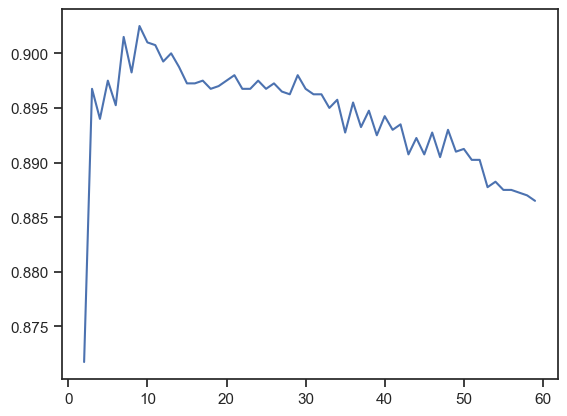

In [39]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [40]:
# 5.Обучение модели и оценка качества с учетом подобранных гиперпараметров
clf_gs.best_estimator_.fit(X_train, y_train)
target2_0 = clf_gs.best_estimator_.predict(X_train)
target2_1 = clf_gs.best_estimator_.predict(X_test)

In [41]:
# Новое качество модели
accuracy_score(y_train, target2_0), accuracy_score(y_test, target2_1)

(0.9175, 0.89375)

In [42]:
# Качество модели до подбора гиперпараметров
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.9309375, 0.90125)

In [43]:
#подбор гиперпараметра K с использованием RandomizedSearchCV

In [44]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=StratifiedKFold(n_splits=5), scoring='accuracy',n_jobs=-1)
clf_rs.fit(X, y)

CPU times: total: 46.9 ms
Wall time: 426 ms


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions=[{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59])}],
                   scoring='accuracy')

In [45]:
clf_rs.best_score_, clf_rs.best_params_

(0.8955, {'n_neighbors': 21})

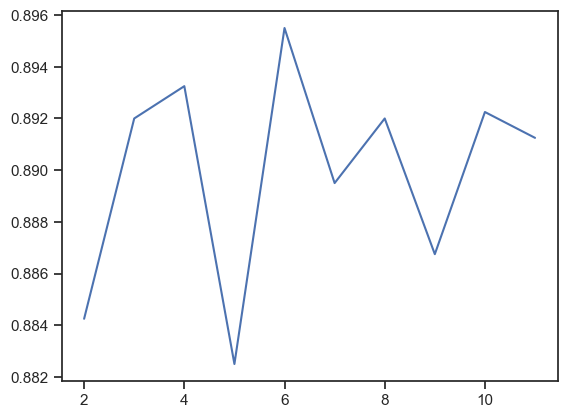

In [46]:
plt.plot(n_range[:10], clf_rs.cv_results_['mean_test_score'])

In [47]:
clf_rs.best_estimator_.fit(X_train, y_train)
target22_0 = clf_gs.best_estimator_.predict(X_train)
target22_1 = clf_gs.best_estimator_.predict(X_test)

In [48]:
# Новое качество модели
accuracy_score(y_train, target22_0), accuracy_score(y_test, target22_1)

(0.9175, 0.89375)

In [49]:
# Качество модели до подбора гиперпараметров
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.9309375, 0.90125)

In [50]:
from sklearn.model_selection import learning_curve, validation_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [51]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='accuracy'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\icosane\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

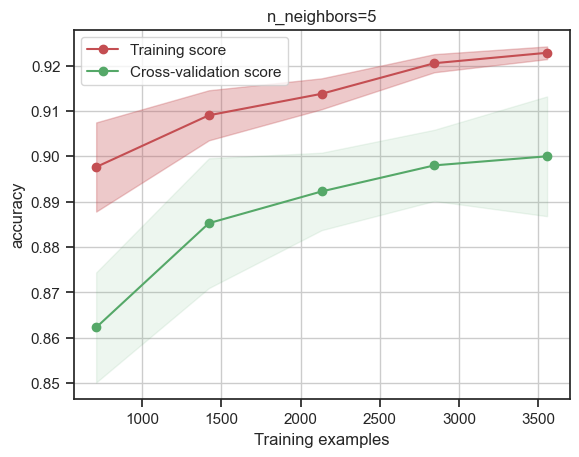

In [52]:
# 6.Построение кривых обучения и валидации
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=5', 
                    X, y, cv=9, train_sizes=np.linspace(.2, 1.0, 5))

<module 'matplotlib.pyplot' from 'c:\\Users\\icosane\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

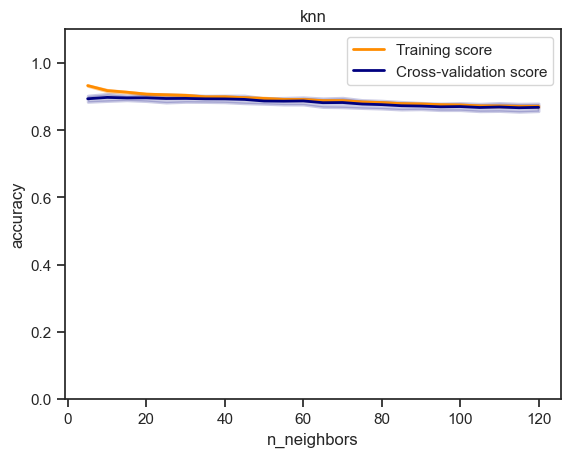

In [53]:
n_range2 = np.array(range(5,125,5))
plot_validation_curve(clf_gs.best_estimator_, 'knn', 
                      X, y, 
                      param_name='n_neighbors', param_range=n_range2, 
                      cv=9, scoring="accuracy")

<module 'matplotlib.pyplot' from 'c:\\Users\\icosane\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

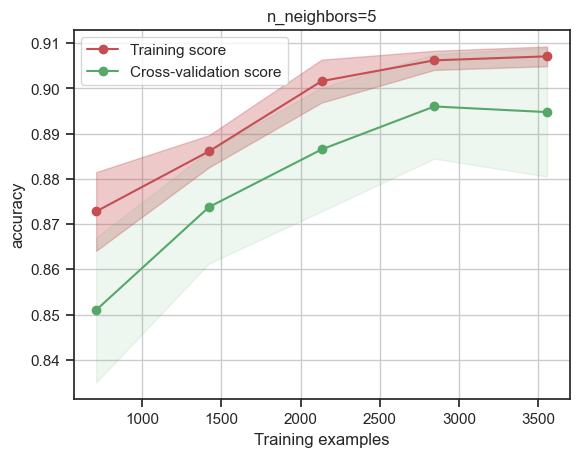

In [54]:
plot_learning_curve(clf_rs.best_estimator_, 'n_neighbors=5', 
                    X, y, cv=9, train_sizes=np.linspace(.2, 1.0, 5))

<module 'matplotlib.pyplot' from 'c:\\Users\\icosane\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

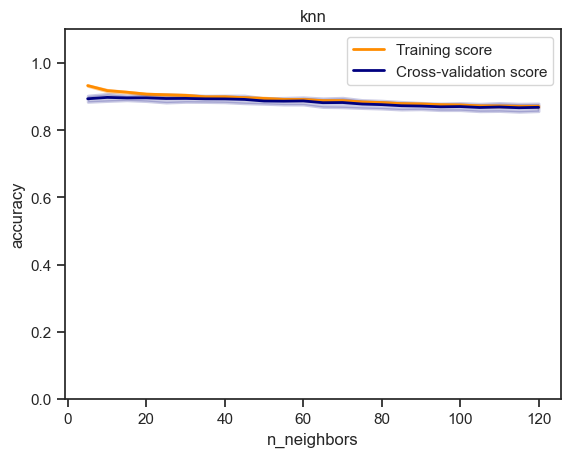

In [55]:
plot_validation_curve(clf_rs.best_estimator_, 'knn', 
                      X, y, 
                      param_name='n_neighbors', param_range=n_range2, 
                      cv=9, scoring="accuracy")

In [56]:
classification_report(y_train, target2_0, 
                      target_names=['Good','Bad'], output_dict=True)

{'Good': {'precision': 0.912,
  'recall': 0.924516531503431,
  'f1-score': 0.9182156133828996,
  'support': 1603.0},
 'Bad': {'precision': 0.9231746031746032,
  'recall': 0.9104571070757671,
  'f1-score': 0.9167717528373267,
  'support': 1597.0},
 'accuracy': 0.9175,
 'macro avg': {'precision': 0.9175873015873016,
  'recall': 0.9174868192895991,
  'f1-score': 0.9174936831101131,
  'support': 3200.0},
 'weighted avg': {'precision': 0.9175768253968255,
  'recall': 0.9175,
  'f1-score': 0.9174950367293746,
  'support': 3200.0}}

In [57]:
classification_report(y_train, target22_0, 
                      target_names=['Good','Bad'], output_dict=True)

{'Good': {'precision': 0.912,
  'recall': 0.924516531503431,
  'f1-score': 0.9182156133828996,
  'support': 1603.0},
 'Bad': {'precision': 0.9231746031746032,
  'recall': 0.9104571070757671,
  'f1-score': 0.9167717528373267,
  'support': 1597.0},
 'accuracy': 0.9175,
 'macro avg': {'precision': 0.9175873015873016,
  'recall': 0.9174868192895991,
  'f1-score': 0.9174936831101131,
  'support': 3200.0},
 'weighted avg': {'precision': 0.9175768253968255,
  'recall': 0.9175,
  'f1-score': 0.9174950367293746,
  'support': 3200.0}}

In [58]:
classification_report(y_test, target2_1, 
                      target_names=['Good','Bad'], output_dict=True)

{'Good': {'precision': 0.895,
  'recall': 0.8927680798004988,
  'f1-score': 0.8938826466916354,
  'support': 401.0},
 'Bad': {'precision': 0.8925,
  'recall': 0.8947368421052632,
  'f1-score': 0.8936170212765957,
  'support': 399.0},
 'accuracy': 0.89375,
 'macro avg': {'precision': 0.89375,
  'recall': 0.893752460952881,
  'f1-score': 0.8937498339841156,
  'support': 800.0},
 'weighted avg': {'precision': 0.8937531249999999,
  'recall': 0.89375,
  'f1-score': 0.8937501660158844,
  'support': 800.0}}

In [60]:
classification_report(y_test, target22_1, 
                      target_names=['Good','Bad'], output_dict=True)

{'Good': {'precision': 0.895,
  'recall': 0.8927680798004988,
  'f1-score': 0.8938826466916354,
  'support': 401.0},
 'Bad': {'precision': 0.8925,
  'recall': 0.8947368421052632,
  'f1-score': 0.8936170212765957,
  'support': 399.0},
 'accuracy': 0.89375,
 'macro avg': {'precision': 0.89375,
  'recall': 0.893752460952881,
  'f1-score': 0.8937498339841156,
  'support': 800.0},
 'weighted avg': {'precision': 0.8937531249999999,
  'recall': 0.89375,
  'f1-score': 0.8937501660158844,
  'support': 800.0}}